In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('mbti_1.csv')
print(df.head(10))
print("*"*40)
print(df.info())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [ ]:
# we can observe there was no null data , So there is no need for Data Cleaning

In [4]:
#checking if the words per tweet of each person shows us some information

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


In [5]:
df.head()

,type,posts,words_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34


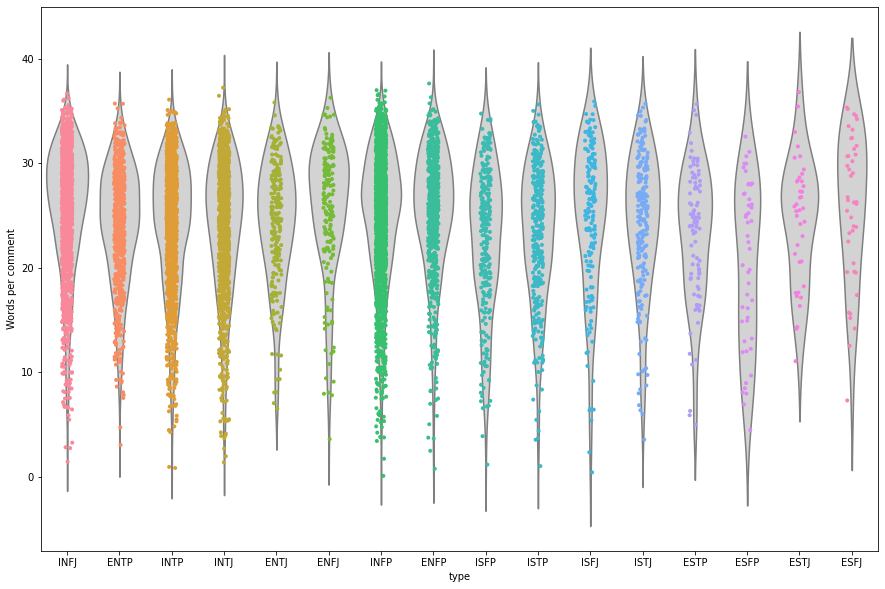

In [7]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

In [ ]:
#creating new columns showing the amount of questionmarks per comment, 
#exclamations or other types will be useful later on, as we will see.

<Figure size 1080x720 with 0 Axes>

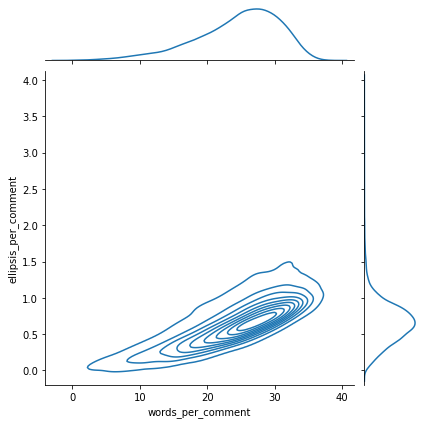

In [8]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')

<Figure size 1080x720 with 0 Axes>

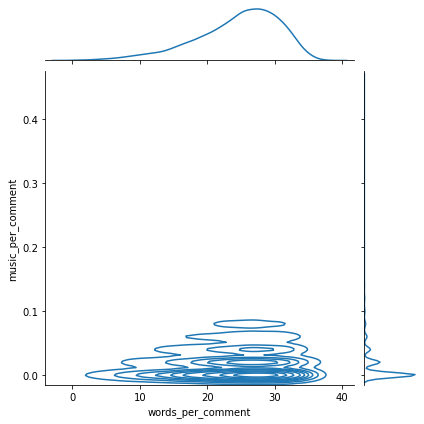

In [10]:
plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment',y='music_per_comment',data=df,kind='kde')

In [ ]:
#We are focusing on the correlation variables for the different types of the personality types the 
#Meyer Briggs outline in comparision to the words comments and ellipses per comment as well.
#Let's see which personality type will yield the highest correlation value.

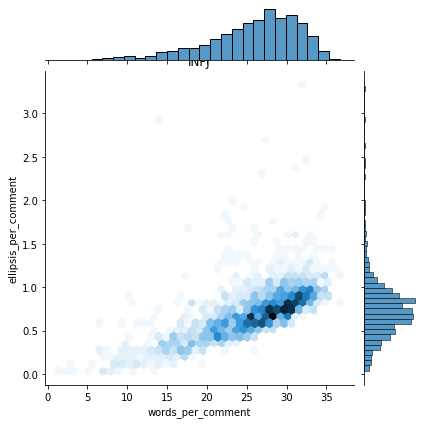

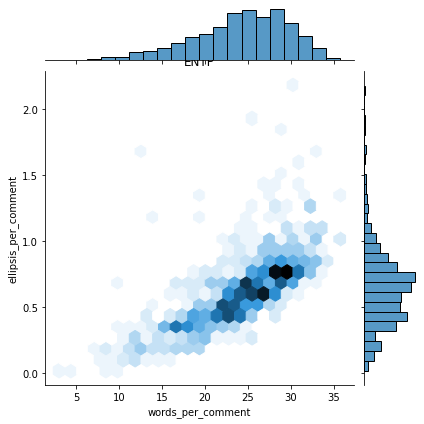

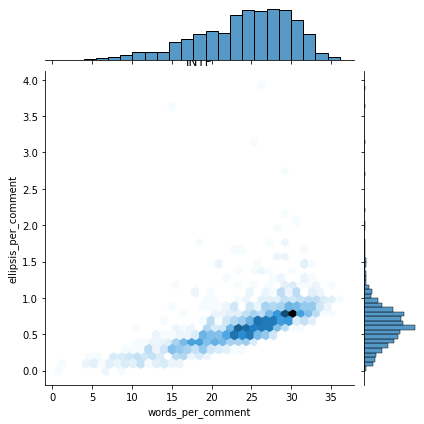

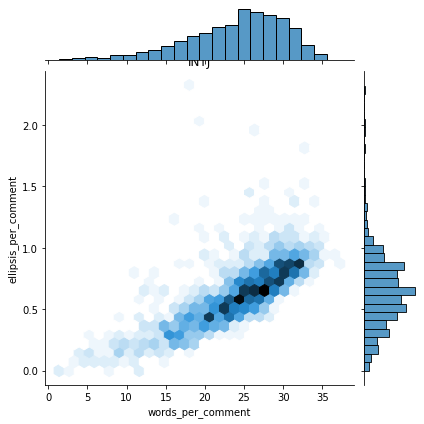

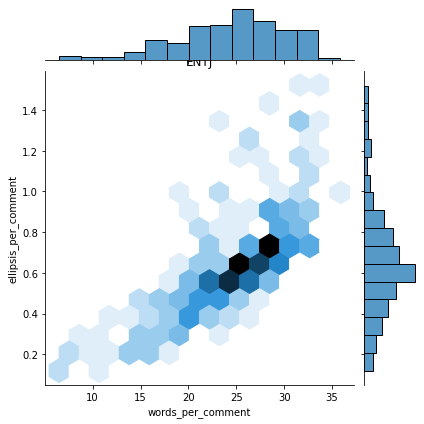

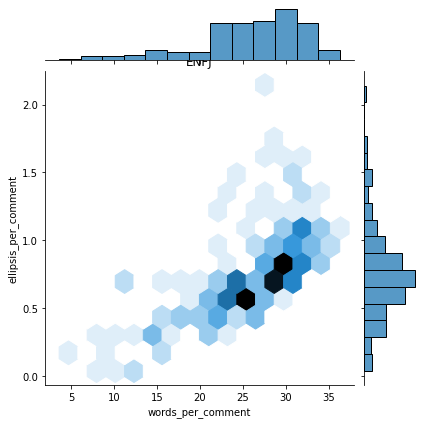

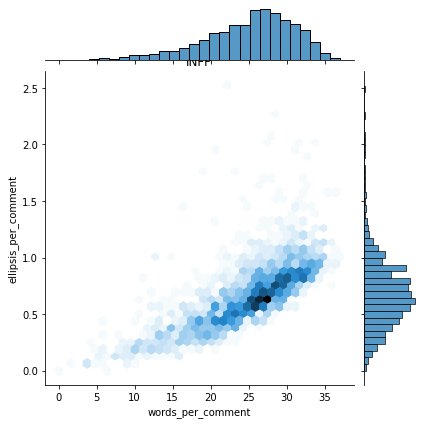

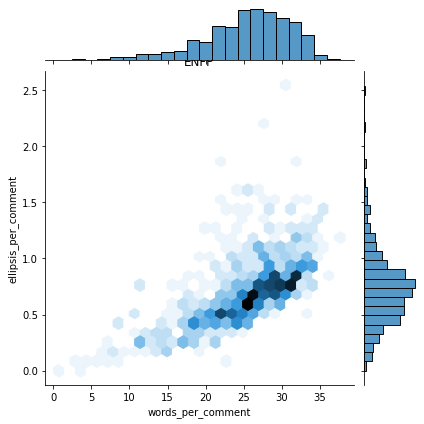

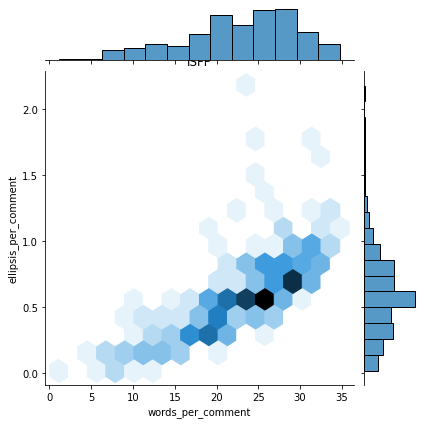

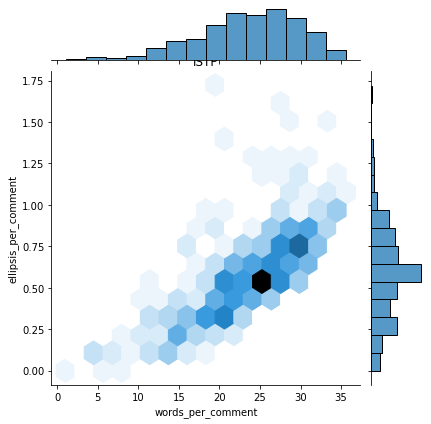

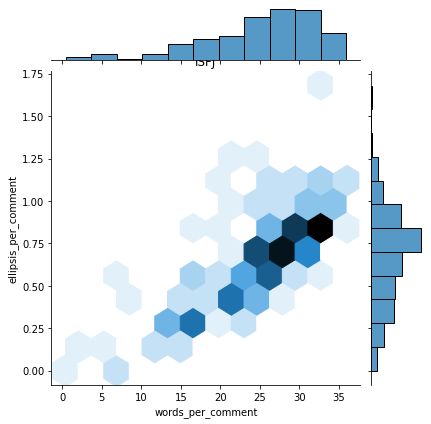

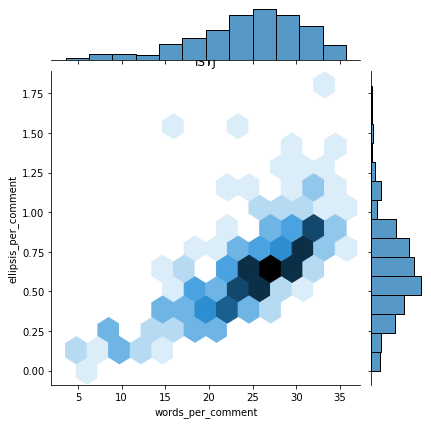

In [11]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1

0.6399820319539543
0.7054114704760909
0.641741709999527
0.7418360967765787
0.7423804864273493
0.670137093089687
0.7223598412495943
0.6421043831098797
0.723912910693046
0.7305845421989157
0.7604230880988554
0.6974642499076582
[0.7604230880988554, 0.7423804864273493, 0.7418360967765787, 0.7305845421989157, 0.723912910693046, 0.7223598412495943, 0.7054114704760909, 0.6974642499076582, 0.670137093089687, 0.6421043831098797, 0.641741709999527, 0.6399820319539543]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ISTJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ISFJ']


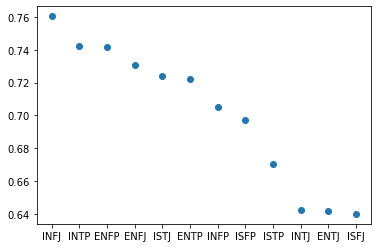

In [12]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

In [ ]:
#highest correlations are
#INFJ
#INTP
#ENEP

In [ ]:
#To get a further insight on our dataset, we can first create 4 new columns dividing
#the people by introversion/extroversion, intuition/sensing, and so on.

#When it comes to performing machine learning, trying to distinguish between two categories is 
#much easier than distinguishing between 16 categories. We will check that later on. 
#Dividing the data in 4 small groups will perhaps be more useful when it comes to accuracy.

In [ ]:
#DATA PREPROCESSING

In [13]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              26.58   
7  INTJ  'I tend to build up a collection of things on ...              24.46   
8  INFJ  I'm not sure, that's a good question. The dist...              14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              24.66   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48        

In [14]:
#BUILDING MACHINE LEARING ALGORITHMS
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(round(acc_sgd,2,), "%")

(8675,)
(8675, 7)
15.04 %


In [15]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

23.25 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

46.62 %


In [18]:
#DECISION TREE
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
acc_dt = round(model.score(X_train, y_train) * 100, 2)
print(round(acc_dt,2,), '%')

100.0 %


In [ ]:
#Now we will perform machine learning with the introverted/extroverted column, 
#and we'll see if our model is able to classify if someone is introverted or 
#extroverted with a higher precision. So let's take a deeper dive into our
#model to get a better perspective on our predicting.
#Because this isn't going to be high enough quality to be helpful for anyone.

In [24]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print("outcome shape",yy.shape)
print("input shape for machine learning data",XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)

sgdd = SGDClassifier(max_iter=5, tol=None)
sgdd.fit(XX_train, yy_train)
Y_predd = sgdd.predict(XX_test)
sgdd.score(XX_train, yy_train)
acc_sgdd = round(sgdd.score(XX_train, yy_train) * 100, 2)
print('Decision tree prediction value',round(acc_sgdd,2,), "%")

outcome shape (8675,)
input shape for machine learning data (8675, 10)
Decision tree prediction value 77.08 %


In [20]:
# Logistic Regression
logregg = LogisticRegression()
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print("Logisitic Regression Prediction Accuracy",round(acc_logg,2,), "%")

Logisitic Regression Prediction Accuracy 77.14 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print("Knn neighbor prediction value",round(acc_knnn,2,), "%")

Knn neighbor prediction value 83.66 %


In [23]:
modell=tree.DecisionTreeClassifier()
modell.fit(XX_train,yy_train)
Y_predd = modell.predict(XX_test)
acc_dtt = round(modell.score(XX_train, yy_train) * 100, 2)
print('Decision tree prediction value',round(acc_dtt,2,), '%')

Decision tree prediction value 100.0 %
